# The Battle of Neighborhoods - Curitiba

Reading neighborhood data from the Wikipedia page using pandas and transforming into the dataframe shown below.

In [10]:
import pandas as pd

url = 'https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Curitiba'
dfs = pd.read_html(url)
for i in range(1,10):
    dfs[i].drop(labels=[0, 1, 2], axis=0, inplace=True)
    dfs[i].drop(labels=[1, 2, 3, 5], axis=1, inplace=True)
    dfs[i].columns = ['neighbourhood', 'total_population', 'monthly_income']

dfs[1]['Borough'] = 'Bairro Novo'
dfs[2]['Borough'] = 'Boa Vista'
dfs[3]['Borough'] = 'Boqueirão'
dfs[4]['Borough'] = 'Cajuru'
dfs[5]['Borough'] = 'Cidade Industrial de Curitiba'
dfs[6]['Borough'] = 'Fazendinha Portão'
dfs[7]['Borough'] = 'Matriz'
dfs[8]['Borough'] = 'Pinheirinho'
dfs[9]['Borough'] = 'Santa Felicidade'

df = dfs[1].append([dfs[2], dfs[3], dfs[4], dfs[5], dfs[6], dfs[7], dfs[8], dfs[9]])
df.reset_index(inplace=True)
df

,index,neighbourhood,total_population,monthly_income,Borough
0,3,Ganchinho,7 325,76735,Bairro Novo
1,4,Sitio Cercado,102 410,93495,Bairro Novo
2,5,Umbará,14 595,90870,Bairro Novo
3,3,Abranches,11 165,"1 009,67",Boa Vista
4,4,Atuba,12 632,"1 211,60",Boa Vista
...,...,...,...,...,...
71,11,Santo Inácio,6 037,"1 518,26",Santa Felicidade
72,12,São Braz,23 119,"1 206,50",Santa Felicidade
73,13,São João,2 950,"1 166,03",Santa Felicidade
74,14,Seminário,7 395,"3 210,65",Santa Felicidade


### Data pre-processing

In [11]:
df.dtypes

index                int64
neighbourhood       object
total_population    object
monthly_income      object
Borough             object
dtype: object

Fixing monthly income data that was read incorrectly (missing the comma)

In [12]:
import numpy as np

df['monthly_income'] = np.where((df['monthly_income'].str.contains(',', regex=False) == False), df['monthly_income'].str[:-2], df.monthly_income)
df

,index,neighbourhood,total_population,monthly_income,Borough
0,3,Ganchinho,7 325,767,Bairro Novo
1,4,Sitio Cercado,102 410,934,Bairro Novo
2,5,Umbará,14 595,908,Bairro Novo
3,3,Abranches,11 165,"1 009,67",Boa Vista
4,4,Atuba,12 632,"1 211,60",Boa Vista
...,...,...,...,...,...
71,11,Santo Inácio,6 037,"1 518,26",Santa Felicidade
72,12,São Braz,23 119,"1 206,50",Santa Felicidade
73,13,São João,2 950,"1 166,03",Santa Felicidade
74,14,Seminário,7 395,"3 210,65",Santa Felicidade


Removing spaces and replacing ',' with '.' on numeric values

In [13]:
df['monthly_income'] = df['monthly_income'].str.replace(',', '.')
df['total_population'] = df['total_population'].str.replace('\xa0', '')
df['monthly_income'] = df['monthly_income'].str.replace('\xa0', '')
df

,index,neighbourhood,total_population,monthly_income,Borough
0,3,Ganchinho,7325,767,Bairro Novo
1,4,Sitio Cercado,102410,934,Bairro Novo
2,5,Umbará,14595,908,Bairro Novo
3,3,Abranches,11165,1009.67,Boa Vista
4,4,Atuba,12632,1211.60,Boa Vista
...,...,...,...,...,...
71,11,Santo Inácio,6037,1518.26,Santa Felicidade
72,12,São Braz,23119,1206.50,Santa Felicidade
73,13,São João,2950,1166.03,Santa Felicidade
74,14,Seminário,7395,3210.65,Santa Felicidade


Casting monthly_income and total_population data from object to integer and float

In [14]:
df['monthly_income'] = pd.to_numeric(df['monthly_income'])
df['total_population'] = pd.to_numeric(df['total_population'])
df.dtypes

index                 int64
neighbourhood        object
total_population      int64
monthly_income      float64
Borough              object
dtype: object

Adding coordinates of each neighborhood to the dataframe

In [15]:
!pip install geopy
from geopy.geocoders import Nominatim

for index, row in df.iterrows():
    address = '{}, curitiba'.format(row['neighbourhood'])
    geolocator = Nominatim(user_agent="curitiba_explorer")
    location = geolocator.geocode(address)
    df.loc[index, 'latitude'] = location.latitude
    df.loc[index, 'longitude'] = location.longitude

df

,index,neighbourhood,total_population,monthly_income,Borough,latitude,longitude
0,3,Ganchinho,7325,767.00,Bairro Novo,-25.572076,-49.263667
1,4,Sitio Cercado,102410,934.00,Bairro Novo,-25.542701,-49.269106
2,5,Umbará,14595,908.00,Bairro Novo,-25.568169,-49.285699
3,3,Abranches,11165,1009.67,Boa Vista,-25.361474,-49.272054
4,4,Atuba,12632,1211.60,Boa Vista,-25.387500,-49.206606
...,...,...,...,...,...,...,...
71,11,Santo Inácio,6037,1518.26,Santa Felicidade,-25.425206,-49.328578
72,12,São Braz,23119,1206.50,Santa Felicidade,-25.418226,-49.350834
73,13,São João,2950,1166.03,Santa Felicidade,-25.391453,-49.311479
74,14,Seminário,7395,3210.65,Santa Felicidade,-25.448910,-49.305147


### Visualizing the data

Displaying a map of Curitiba with neighborhoods superimposed on top

In [16]:
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium --yes
import folium


address = 'Curitiba, Brasil'
geolocator = Nominatim(user_agent="curitiba_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_curitiba = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(df['latitude'], df['longitude'], df['Borough'], df['neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_curitiba)  

map_curitiba


Solving environment: done

# All requested packages already installed.



Calculating the average income from each borough

In [17]:
df_income = df.groupby('Borough').mean()
df_income = df_income['monthly_income'].sort_values()
df_income

Borough
Cidade Industrial de Curitiba     522.500000
Pinheirinho                       647.000000
Bairro Novo                       869.666667
Boqueirão                        1337.807500
Cajuru                           1383.590000
Fazendinha Portão                1515.570909
Boa Vista                        1612.306923
Santa Felicidade                 1681.374615
Matriz                           2896.936667
Name: monthly_income, dtype: float64

Text(0, 0.5, 'Average income in reais')

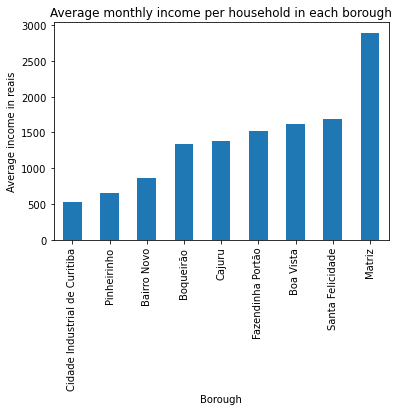

In [18]:
from matplotlib import pyplot as plt

df_income.plot(kind="bar")
plt.title("Average monthly income per household in each borough")
plt.ylabel("Average income in reais")

Narrowing down the search to only Fazendinha Portão borough based on prefered location and average monthly income

In [19]:
fp_data = df[df['Borough'] == 'Fazendinha Portão'].reset_index(drop=True)
fp_data

,index,neighbourhood,total_population,monthly_income,Borough,latitude,longitude
0,3,Água Verde,49866,3332.57,Fazendinha Portão,-25.455263,-49.282808
1,4,Campo Comprido,21638,1216.71,Fazendinha Portão,-25.453340,-49.328432
2,5,Fanny,7866,1189.54,Fazendinha Portão,-25.479200,-49.266138
3,6,Fazendinha,26122,833.00,Fazendinha Portão,-25.879021,-50.541960
4,7,Guaíra,14268,1235.61,Fazendinha Portão,-25.470043,-49.275242
5,8,Lindoia,8343,809.00,Fazendinha Portão,-25.479004,-49.277692
6,9,Novo Mundo,42999,1040.40,Fazendinha Portão,-25.486966,-49.296063
7,10,Parolin,11982,1365.48,Fazendinha Portão,-25.459976,-49.263767
8,11,Portão,40735,1722.89,Fazendinha Portão,-25.473700,-49.302414
9,12,Santa Quitéria,11720,1487.95,Fazendinha Portão,-25.462602,-49.310944


### Using Foursquare API to get nearby venues 

Foursquare credentials

In [20]:
CLIENT_ID = 'YDVSOOEX3YWTRV5F1ESJF22KNPQNOISRQQDTS1AZDID1KPUC' # your Foursquare ID
CLIENT_SECRET = '1QUY23CO5FV3PPBQDTIG1FB3NGPYDGFDAEVPZS3NJA24YIRO' # your Foursquare Secret
ACCESS_TOKEN = 'CCBAMLDHUTEX1BVHPVFFDULUBGXL2BZCSZI30TKNH04XWMBA' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YDVSOOEX3YWTRV5F1ESJF22KNPQNOISRQQDTS1AZDID1KPUC
CLIENT_SECRET:1QUY23CO5FV3PPBQDTIG1FB3NGPYDGFDAEVPZS3NJA24YIRO


Function to get nearby venues using neighborhood name and coordinates

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Creating a dataframe with the venues

In [22]:
import requests
import re

fp_venues = getNearbyVenues(names=fp_data['neighbourhood'],
                                   latitudes=fp_data['latitude'],
                                   longitudes=fp_data['longitude']
                                  )

Água Verde
Campo Comprido
Fanny
Fazendinha
Guaíra
Lindoia
Novo Mundo
Parolin
Portão
Santa Quitéria
Vila Izabel


In [23]:
print(fp_venues.shape)
fp_venues.head()

(174, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Água Verde,-25.455263,-49.282808,Dança Dos Noivos/Atitude Dança de Salão,-25.456779,-49.284119,Dance Studio
1,Água Verde,-25.455263,-49.282808,Baggio Pizzeria & Focacceria,-25.455261,-49.285364,Pizza Place
2,Água Verde,-25.455263,-49.282808,Quintal HopLand,-25.452677,-49.282720,Beer Store
3,Água Verde,-25.455263,-49.282808,Confeitaria Jauense,-25.458342,-49.284573,Bakery
4,Água Verde,-25.455263,-49.282808,The Factory Gym Academia,-25.451774,-49.282586,Gym / Fitness Center


Number of venues per neighborhood

In [24]:
fp_venues.groupby('Neighborhood').count()['Venue']

Neighborhood
Campo Comprido     4
Fanny             16
Guaíra             9
Lindoia            9
Novo Mundo        11
Parolin           16
Portão            25
Santa Quitéria    29
Vila Izabel       25
Água Verde        30
Name: Venue, dtype: int64

In [25]:
print('There are {} unique categories.'.format(len(fp_venues['Venue Category'].unique())))

There are 72 unique categories.


Number of venues of each category

In [26]:
fp_venues.groupby('Venue Category').count()['Venue'].sort_values()

Venue Category
Argentinian Restaurant     1
Food                       1
Food Truck                 1
Fried Chicken Joint        1
Furniture / Home Store     1
                          ..
Soccer Field               7
Gym                        8
Brazilian Restaurant       9
Pizza Place               13
Bakery                    16
Name: Venue, Length: 72, dtype: int64

One hot encoding and analysing each neighborhood

In [27]:
fp_onehot = pd.get_dummies(fp_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
fp_onehot['Neighborhood'] = fp_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [fp_onehot.columns[-1]] + list(fp_onehot.columns[:-1])
fp_onehot = fp_onehot[fixed_columns]

fp_onehot.head()

,Neighborhood,Argentinian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bistro,Bookstore,Brazilian Restaurant,...,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tennis Court,Theater,Theme Park,Wine Shop,Women's Store
0,Água Verde,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Água Verde,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Água Verde,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Água Verde,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Água Verde,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
fp_grouped = fp_onehot.groupby('Neighborhood').mean().reset_index()
fp_grouped

,Neighborhood,Argentinian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bistro,Bookstore,Brazilian Restaurant,...,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tennis Court,Theater,Theme Park,Wine Shop,Women's Store
0,Campo Comprido,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.000000,0.00
1,Fanny,0.000000,0.062500,0.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.0625,0.000000,0.00
2,Guaíra,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,...,0.0000,0.111111,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.000000,0.00
3,Lindoia,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.000000,0.00
4,Novo Mundo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,...,0.0000,0.000000,0.090909,0.000000,0.00,0.0000,0.00,0.0000,0.000000,0.00
5,Parolin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,...,0.0625,0.000000,0.000000,0.000000,0.00,0.1875,0.00,0.0000,0.000000,0.00
6,Portão,0.000000,0.000000,0.080000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.040000,0.040000,0.000000,0.00,0.0000,0.04,0.0000,0.000000,0.00
7,Santa Quitéria,0.000000,0.034483,0.137931,0.000000,0.000000,0.000000,0.034483,0.000000,0.103448,...,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.034483,0.00
8,Vila Izabel,0.000000,0.000000,0.080000,0.040000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.0000,0.000000,0.040000,0.080000,0.04,0.0000,0.00,0.0000,0.000000,0.04
9,Água Verde,0.033333,0.033333,0.033333,0.033333,0.033333,0.066667,0.000000,0.000000,0.100000,...,0.0000,0.000000,0.000000,0.033333,0.00,0.0000,0.00,0.0000,0.000000,0.00


Printing each neighborhood along with the top 5 most common venues

In [29]:
num_top_venues = 5

for hood in fp_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = fp_grouped[fp_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Campo Comprido----
                       venue  freq
0                        Gym  0.25
1                     Bakery  0.25
2  Middle Eastern Restaurant  0.25
3                Pizza Place  0.25
4           Lottery Retailer  0.00


----Fanny----
           venue  freq
0         Bakery  0.19
1            Gym  0.12
2  Hot Dog Joint  0.12
3      BBQ Joint  0.06
4      Pet Store  0.06


----Guaíra----
                 venue  freq
0               Bakery  0.22
1               Market  0.11
2                Diner  0.11
3  Japanese Restaurant  0.11
4            Bookstore  0.11


----Lindoia----
              venue  freq
0  Recording Studio  0.11
1            Market  0.11
2       Pizza Place  0.11
3              Park  0.11
4       Bus Station  0.11


----Novo Mundo----
               venue  freq
0       Soccer Field  0.18
1           Gym Pool  0.09
2                Gym  0.09
3        Gas Station  0.09
4  Electronics Store  0.09


----Parolin----
                  venue  freq
0          Tennis

Creating a dataframe with the 10 most common venues of each neighborhood

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
import numpy as np

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = fp_grouped['Neighborhood']

for ind in np.arange(fp_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(fp_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Campo Comprido,Pizza Place,Bakery,Middle Eastern Restaurant,Gym,Women's Store,Dessert Shop,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega
1,Fanny,Bakery,Gym,Hot Dog Joint,Soccer Field,Liquor Store,Pet Store,Pharmacy,Gym / Fitness Center,Market,Electronics Store
2,Guaíra,Bakery,Electronics Store,Market,Café,Steakhouse,Bookstore,Japanese Restaurant,Diner,Dessert Shop,Cosmetics Shop
3,Lindoia,Buffet,Park,Bakery,Market,Convenience Store,Pizza Place,Recording Studio,Ice Cream Shop,Bus Station,Deli / Bodega
4,Novo Mundo,Soccer Field,Pet Store,Supermarket,Market,Bus Station,Gym Pool,Electronics Store,Brazilian Restaurant,Gym,Gas Station
5,Parolin,Tennis Court,Gym / Fitness Center,Café,Gastropub,Brazilian Restaurant,Gym,Event Service,Electronics Store,Cosmetics Shop,Clothing Store
6,Portão,Restaurant,Bakery,Bar,Dance Studio,Pizza Place,Paper / Office Supplies Store,Candy Store,Italian Restaurant,Coffee Shop,Convenience Store
7,Santa Quitéria,Bakery,Brazilian Restaurant,Soccer Field,Churrascaria,Pizza Place,Business Service,Recording Studio,Farmers Market,Furniture / Home Store,Wine Shop
8,Vila Izabel,Pizza Place,Churrascaria,Bakery,Sushi Restaurant,Brazilian Restaurant,Coffee Shop,Paper / Office Supplies Store,Food Truck,Deli / Bodega,Plaza
9,Água Verde,Brazilian Restaurant,Pizza Place,Beer Store,Argentinian Restaurant,Burger Joint,Diner,Dessert Shop,Dance Studio,Gym,Gym / Fitness Center


### Clustering neighborhoods

K-means clustering

In [32]:
from sklearn.cluster import KMeans

kclusters = 3
fp_grouped_clustering = fp_grouped.drop('Neighborhood', 1)
# k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(fp_grouped_clustering)
kmeans.labels_[0:10]

array([0, 1, 2, 2, 1, 1, 2, 2, 2, 2], dtype=int32)

In [33]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

fp_data.rename(columns={'neighbourhood': 'Neighborhood'}, inplace=True)
fp_merged = fp_data.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
fp_merged.drop(labels=[3], axis=0, inplace=True)
fp_merged.reset_index(inplace=True)
fp_merged

,level_0,index,Neighborhood,total_population,monthly_income,Borough,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,3,Água Verde,49866,3332.57,Fazendinha Portão,-25.455263,-49.282808,2.0,Brazilian Restaurant,Pizza Place,Beer Store,Argentinian Restaurant,Burger Joint,Diner,Dessert Shop,Dance Studio,Gym,Gym / Fitness Center
1,1,4,Campo Comprido,21638,1216.71,Fazendinha Portão,-25.453340,-49.328432,0.0,Pizza Place,Bakery,Middle Eastern Restaurant,Gym,Women's Store,Dessert Shop,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega
2,2,5,Fanny,7866,1189.54,Fazendinha Portão,-25.479200,-49.266138,1.0,Bakery,Gym,Hot Dog Joint,Soccer Field,Liquor Store,Pet Store,Pharmacy,Gym / Fitness Center,Market,Electronics Store
3,4,7,Guaíra,14268,1235.61,Fazendinha Portão,-25.470043,-49.275242,2.0,Bakery,Electronics Store,Market,Café,Steakhouse,Bookstore,Japanese Restaurant,Diner,Dessert Shop,Cosmetics Shop
4,5,8,Lindoia,8343,809.00,Fazendinha Portão,-25.479004,-49.277692,2.0,Buffet,Park,Bakery,Market,Convenience Store,Pizza Place,Recording Studio,Ice Cream Shop,Bus Station,Deli / Bodega
5,6,9,Novo Mundo,42999,1040.40,Fazendinha Portão,-25.486966,-49.296063,1.0,Soccer Field,Pet Store,Supermarket,Market,Bus Station,Gym Pool,Electronics Store,Brazilian Restaurant,Gym,Gas Station
6,7,10,Parolin,11982,1365.48,Fazendinha Portão,-25.459976,-49.263767,1.0,Tennis Court,Gym / Fitness Center,Café,Gastropub,Brazilian Restaurant,Gym,Event Service,Electronics Store,Cosmetics Shop,Clothing Store
7,8,11,Portão,40735,1722.89,Fazendinha Portão,-25.473700,-49.302414,2.0,Restaurant,Bakery,Bar,Dance Studio,Pizza Place,Paper / Office Supplies Store,Candy Store,Italian Restaurant,Coffee Shop,Convenience Store
8,9,12,Santa Quitéria,11720,1487.95,Fazendinha Portão,-25.462602,-49.310944,2.0,Bakery,Brazilian Restaurant,Soccer Field,Churrascaria,Pizza Place,Business Service,Recording Studio,Farmers Market,Furniture / Home Store,Wine Shop
9,10,13,Vila Izabel,10949,2438.13,Fazendinha Portão,-25.456326,-49.293979,2.0,Pizza Place,Churrascaria,Bakery,Sushi Restaurant,Brazilian Restaurant,Coffee Shop,Paper / Office Supplies Store,Food Truck,Deli / Bodega,Plaza


Visualizing clusters

In [34]:
!conda install -c conda-forge folium --yes
import folium
!pip install geopy
from geopy.geocoders import Nominatim

address = 'Curitiba, Brasil'
geolocator = Nominatim(user_agent="curitiba_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = ['red', 'green', 'blue']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(fp_merged['latitude'], fp_merged['longitude'], fp_merged['Neighborhood'], fp_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors_array[int(float(cluster))],
        fill=True,
        fill_color=colors_array[int(float(cluster))],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

Solving environment: done

# All requested packages already installed.



### Cluster 0

Cluster made up of only one neighborhood geographicaly farther away from the other clusters

In [35]:
fp_merged.loc[fp_merged['Cluster Labels'] == 0, fp_merged.columns[[1] + list(range(5, fp_merged.shape[1]))]]

,index,Borough,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,4,Fazendinha Portão,-25.45334,-49.328432,0.0,Pizza Place,Bakery,Middle Eastern Restaurant,Gym,Women's Store,Dessert Shop,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega


### Cluster 1

Cluster of neighborhoods where gyms and/or health related venues are very prominent

In [36]:
fp_merged.loc[fp_merged['Cluster Labels'] == 1, fp_merged.columns[[1] + list(range(5, fp_merged.shape[1]))]]

,index,Borough,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,5,Fazendinha Portão,-25.479200,-49.266138,1.0,Bakery,Gym,Hot Dog Joint,Soccer Field,Liquor Store,Pet Store,Pharmacy,Gym / Fitness Center,Market,Electronics Store
5,9,Fazendinha Portão,-25.486966,-49.296063,1.0,Soccer Field,Pet Store,Supermarket,Market,Bus Station,Gym Pool,Electronics Store,Brazilian Restaurant,Gym,Gas Station
6,10,Fazendinha Portão,-25.459976,-49.263767,1.0,Tennis Court,Gym / Fitness Center,Café,Gastropub,Brazilian Restaurant,Gym,Event Service,Electronics Store,Cosmetics Shop,Clothing Store


### Cluster 2

Cluster of neighborhoods where food venues are the most common and gyms are only mentioned in one neighborhood

In [37]:
fp_merged.loc[fp_merged['Cluster Labels'] == 2, fp_merged.columns[[1] + list(range(5, fp_merged.shape[1]))]]

,index,Borough,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Fazendinha Portão,-25.455263,-49.282808,2.0,Brazilian Restaurant,Pizza Place,Beer Store,Argentinian Restaurant,Burger Joint,Diner,Dessert Shop,Dance Studio,Gym,Gym / Fitness Center
3,7,Fazendinha Portão,-25.470043,-49.275242,2.0,Bakery,Electronics Store,Market,Café,Steakhouse,Bookstore,Japanese Restaurant,Diner,Dessert Shop,Cosmetics Shop
4,8,Fazendinha Portão,-25.479004,-49.277692,2.0,Buffet,Park,Bakery,Market,Convenience Store,Pizza Place,Recording Studio,Ice Cream Shop,Bus Station,Deli / Bodega
7,11,Fazendinha Portão,-25.473700,-49.302414,2.0,Restaurant,Bakery,Bar,Dance Studio,Pizza Place,Paper / Office Supplies Store,Candy Store,Italian Restaurant,Coffee Shop,Convenience Store
8,12,Fazendinha Portão,-25.462602,-49.310944,2.0,Bakery,Brazilian Restaurant,Soccer Field,Churrascaria,Pizza Place,Business Service,Recording Studio,Farmers Market,Furniture / Home Store,Wine Shop
9,13,Fazendinha Portão,-25.456326,-49.293979,2.0,Pizza Place,Churrascaria,Bakery,Sushi Restaurant,Brazilian Restaurant,Coffee Shop,Paper / Office Supplies Store,Food Truck,Deli / Bodega,Plaza


Based on the data above it is possible to conclude that the cluster 1 is the best choice to open a special diet food store

In [39]:
fp_merged.loc[[2, 5, 6]]

,level_0,index,Neighborhood,total_population,monthly_income,Borough,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,2,5,Fanny,7866,1189.54,Fazendinha Portão,-25.479200,-49.266138,1.0,Bakery,Gym,Hot Dog Joint,Soccer Field,Liquor Store,Pet Store,Pharmacy,Gym / Fitness Center,Market,Electronics Store
5,6,9,Novo Mundo,42999,1040.40,Fazendinha Portão,-25.486966,-49.296063,1.0,Soccer Field,Pet Store,Supermarket,Market,Bus Station,Gym Pool,Electronics Store,Brazilian Restaurant,Gym,Gas Station
6,7,10,Parolin,11982,1365.48,Fazendinha Portão,-25.459976,-49.263767,1.0,Tennis Court,Gym / Fitness Center,Café,Gastropub,Brazilian Restaurant,Gym,Event Service,Electronics Store,Cosmetics Shop,Clothing Store
